去色 convert('L')

反相 ImageChops.invert(im)

颜色减淡 

滤镜~其他~最小值  filter(ImageFilter.MinFilter(3)) 


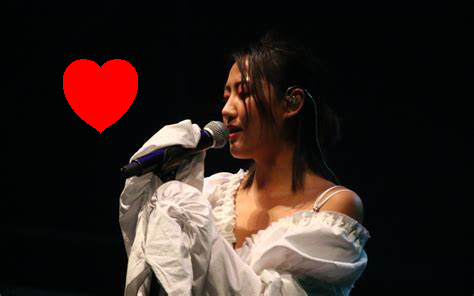

In [45]:
from PIL import Image,ImageDraw

im = Image.open("cl1.jpg")
points = [(100+x,100-y) for y in range(-100,100) for x in range(-100,100) if ((x*0.03)**2+(y*0.03)**2-1)**3-(x*0.03)**2*(y*0.03)**3 <= 0]
d = ImageDraw.Draw(im)
d.point(points,'red')
im

## 水墨

In [18]:
from PIL import Image,ImageChops,ImageFilter

im = Image.open("cl.jpg")
iml = im.convert('L')
imr = ImageChops.invert(iml)

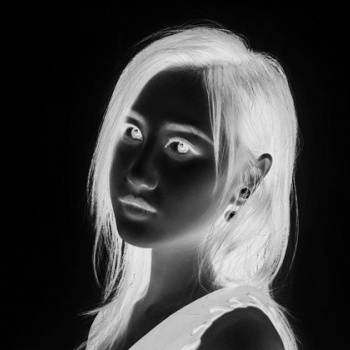

In [19]:
imr

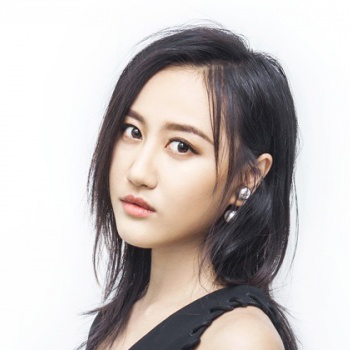

In [20]:
im

In [21]:
s=ImageChops.lighter(iml,imr)

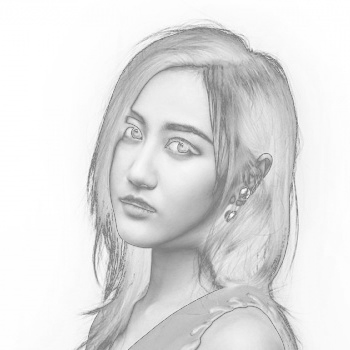

In [22]:
s

In [23]:
tt = s.filter(ImageFilter.MinFilter(3))

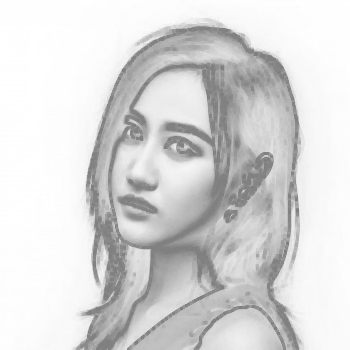

In [24]:
tt

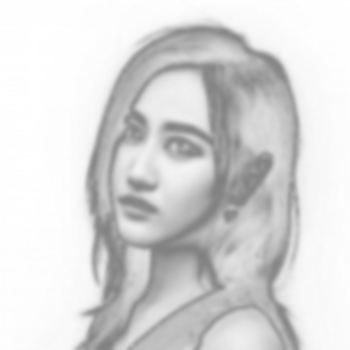

In [25]:
tt.filter(ImageFilter.GaussianBlur(2))

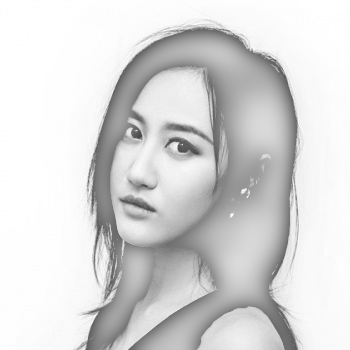

In [26]:
ImageChops.lighter(iml,imr.filter(ImageFilter.GaussianBlur(10)))

## 遮罩，通道

In [28]:
from PIL import Image,ImageChops,ImageFilter

im = Image.open("cl.jpg")
r,g,b = im.split()

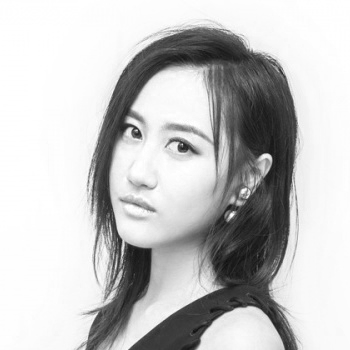

In [29]:
r

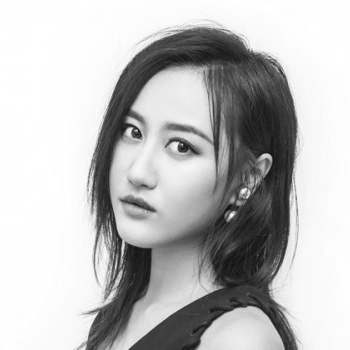

In [30]:
g

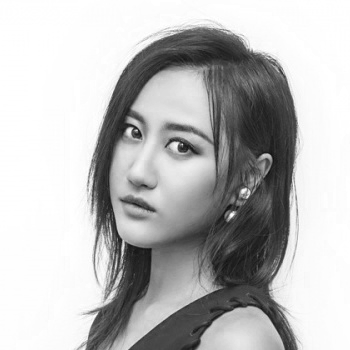

In [31]:
b

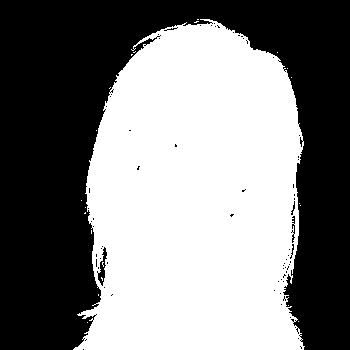

In [48]:
mask = Image.eval(b, lambda p: 0 if p > 240 else 255)
mask

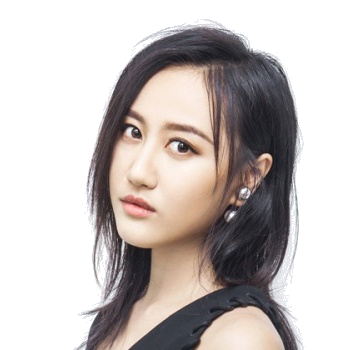

In [49]:
im.putalpha(mask)
im

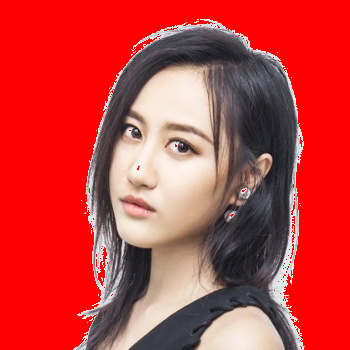

In [50]:
back = Image.new('RGBA',im.size,'red')
back.paste(im,mask)
back

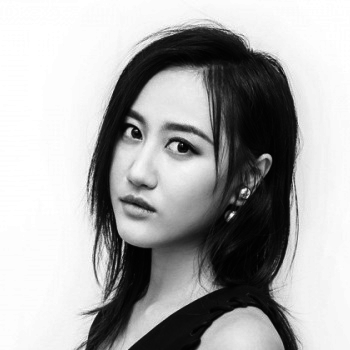

In [55]:
 m = ImageChops.multiply(r,g)
 m

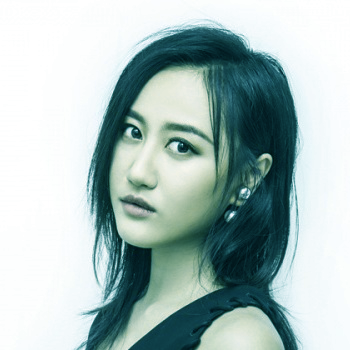

In [60]:
Image.merge('RGB',(m,g,b))

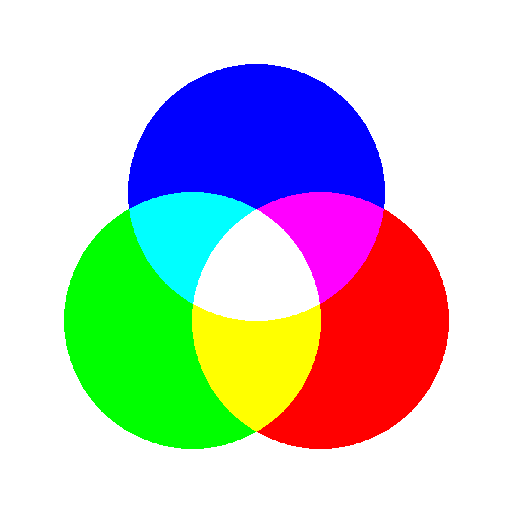

In [27]:
from PIL import Image, ImageDraw, ImageChops

dia = 128
circle = Image.new("L", (dia * 4, dia * 4), 0)
dctx = ImageDraw.Draw(circle)
dctx.ellipse([dia, dia, dia * 3, dia * 3], fill=255)
del dctx

offset = dia // 2
r = ImageChops.offset(circle, offset, offset)
g = ImageChops.offset(circle, -offset, offset)
b = ImageChops.offset(circle, 0, -offset)

dimg = Image.merge("RGB", (r, g, b))
mask = Image.eval(dimg.convert("L"), lambda p: 255 if p > 0 else 0)
dimg.putalpha(mask)
dimg

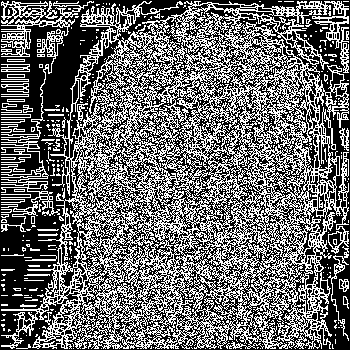

In [69]:
import os
from PIL import Image, ImageMorph
from PIL.ImageMorph import LutBuilder, MorphOp

img = Image.open('cl.jpg').convert('L')
#    img.load()  # MorphOp.apply expects image are loaded.
'''
for op_name in (
        'corner',
        'dilation4', 'dilation8',
        'erosion4', 'erosion8',
        'edge',
        ):
'''
lb = LutBuilder(op_name='edge')
mop = MorphOp(lb.build_lut())
_, dimg = mop.apply(img)
dimg

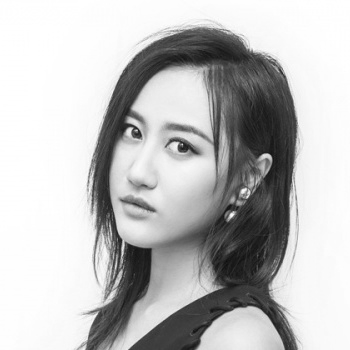

In [64]:
img